In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
def preprocess_data(filename):
    '''
    Inputs the data from the csv and preprocesses it
    Returns the tuple (input_data, labels)
    '''
    data = pd.read_csv(filename)
    data_input = data["Image"].apply(lambda x: np.fromstring(x, sep=" ")).values
    
    # The total number of images in the csv
    num_images = data["Image"].count()
    
    # Fills missing entries
    data.fillna(method="ffill", inplace=True)
    
    data_input_arr = []
    
    for i in range(num_images):
        data_input_arr.append(data_input[i].reshape(96,96,1))
        
    # Normalize Image Data
    data_input_arr = np.array(data_input_arr) / 255.0
    
    data_labels = data.iloc[:,:-1].values
    
    return data_input_arr, data_labels

In [3]:
training_input, training_labels = preprocess_data("training.csv")
test_input, test_labels = preprocess_data("test.csv")

In [8]:


model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(96,96,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.BatchNormalization(),
    #layers.MaxPool2D((2,2)),
    layers.MaxPool2D((2,2)),
    
    #layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    #layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(30, activation="linear")
])

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
#model.summary()

In [9]:
model.fit(training_input, training_labels, epochs=10)

Epoch 1/10
7049/7049 [==============================] - 326s 46ms/sample - loss: 90.3475 - acc: 0.3958
Epoch 2/10
7049/7049 [==============================] - 323s 46ms/sample - loss: 34.3730 - acc: 0.4988
Epoch 3/10
7049/7049 [==============================] - 323s 46ms/sample - loss: 27.3413 - acc: 0.5476
Epoch 4/10
7049/7049 [==============================] - 321s 46ms/sample - loss: 22.9052 - acc: 0.5867
Epoch 5/10
7049/7049 [==============================] - 324s 46ms/sample - loss: 21.0673 - acc: 0.6170
Epoch 6/10
7049/7049 [==============================] - 329s 47ms/sample - loss: 17.8309 - acc: 0.6517
Epoch 7/10
7049/7049 [==============================] - 367s 52ms/sample - loss: 15.4614 - acc: 0.6778
Epoch 8/10
7049/7049 [==============================] - 225s 32ms/sample - loss: 15.3283 - acc: 0.7059
Epoch 9/10
7049/7049 [==============================] - 224s 32ms/sample - loss: 13.9176 - acc: 0.7258
Epoch 10/10
7049/7049 [==============================] - 225s 32ms/sample

In [14]:
pred = model.predict(test_input)
ev = model.evaluate(test_input, test_labels)
ev

1783/1783 [==============================] - 21s 12ms/sample - loss: 975335.9737 - acc: 0.0000e+00


[975335.9736591025, 0.0]

In [18]:
# Converts the prediction of the model into 2 arrays
# 1 array of the predicted x values and 1 of the predicted y values

x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[0][i])
    else:
        y_list.append(pred[0][i])
print(x_list)
print(y_list)

[70.99455, 30.194885, 63.084255, 77.66548, 37.622, 23.428934, 59.203644, 83.486206, 40.323437, 16.58439, 51.070892, 65.49368, 33.03952, 48.90113, 50.625847]
[38.4082, 38.946487, 39.670654, 40.18837, 39.197533, 38.78443, 28.344303, 30.474268, 27.574745, 28.711653, 54.340633, 79.54843, 78.72538, 73.70891, 88.33402]


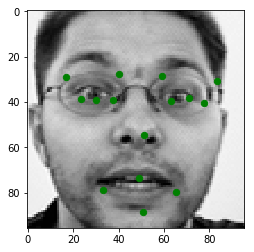

In [15]:
# Plots the image of the test sample with the prediction locations of the points ontop
plt.imshow(test_input[0].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [19]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[1][i])
    else:
        y_list.append(pred[1][i])
print(x_list)
print(y_list)

[67.76594, 28.452993, 60.270527, 73.85021, 36.157093, 22.388132, 55.240696, 80.23349, 37.878094, 15.527508, 49.18826, 66.014046, 33.65075, 49.11863, 49.940872]
[36.873432, 39.07245, 38.19551, 37.854877, 39.924976, 39.287033, 30.315025, 30.281143, 30.701857, 31.721472, 59.095078, 76.281494, 77.72615, 75.48899, 85.12115]


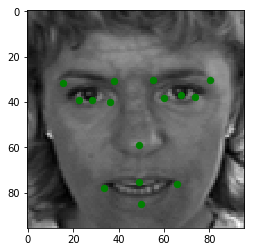

In [20]:
plt.imshow(test_input[1].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [21]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[2][i])
    else:
        y_list.append(pred[2][i])
print(x_list)
print(y_list)

[66.62511, 32.181004, 60.48257, 73.05533, 37.61539, 24.84418, 55.712997, 78.876755, 39.792446, 18.2856, 50.40033, 67.37824, 35.79985, 50.715397, 50.499626]
[37.97248, 39.962807, 38.016945, 36.68733, 39.427834, 39.17344, 30.293707, 30.057806, 31.382505, 32.943752, 57.704678, 75.005615, 76.98326, 73.534454, 80.80845]


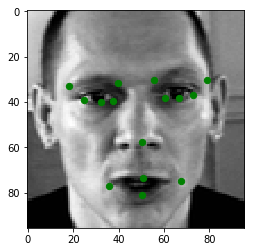

In [22]:
plt.imshow(test_input[2].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [23]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[3][i])
    else:
        y_list.append(pred[3][i])
print(x_list)
print(y_list)

[65.61088, 28.474632, 59.246284, 73.40558, 35.913116, 22.2888, 54.524845, 78.27455, 37.162952, 15.615153, 48.039886, 66.48684, 33.547234, 48.91748, 49.361423]
[39.61497, 41.519688, 38.48356, 38.354744, 40.322273, 40.438503, 30.476938, 30.586298, 30.856588, 33.367184, 54.72445, 75.188034, 78.293465, 72.30885, 81.84481]


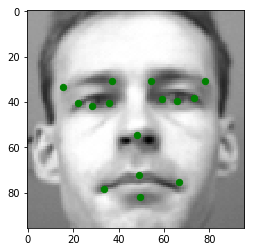

In [24]:
plt.imshow(test_input[3].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [25]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[4][i])
    else:
        y_list.append(pred[4][i])
print(x_list)
print(y_list)

[71.47803, 29.401201, 63.975674, 76.90282, 37.40848, 23.671404, 58.506474, 83.90564, 39.179398, 16.65382, 51.52098, 70.33235, 35.383533, 51.54731, 51.713463]
[39.651844, 41.332806, 39.232346, 39.18895, 41.28933, 41.580246, 30.452602, 31.126833, 31.335344, 34.201145, 59.369263, 77.83528, 80.77351, 75.79108, 86.54726]


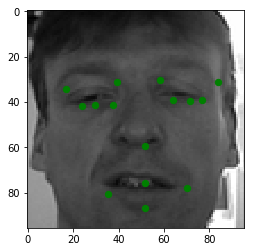

In [26]:
plt.imshow(test_input[4].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [27]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[5][i])
    else:
        y_list.append(pred[5][i])
print(x_list)
print(y_list)

[69.10985, 29.313747, 61.8055, 75.74777, 36.95304, 23.433077, 58.129715, 81.75357, 39.609905, 16.610624, 49.632954, 64.39247, 34.064472, 49.058487, 49.977737]
[38.722946, 40.25106, 40.14134, 40.233273, 40.129406, 39.556034, 31.016212, 32.48874, 30.014338, 31.164637, 54.231903, 79.38777, 80.300026, 73.73465, 87.76971]


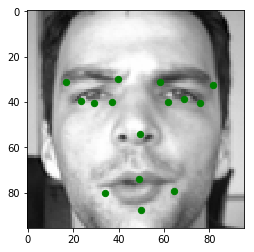

In [28]:
plt.imshow(test_input[5].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [29]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[6][i])
    else:
        y_list.append(pred[6][i])
print(x_list)
print(y_list)

[70.141685, 28.707956, 61.729885, 77.07146, 37.420204, 21.696653, 57.73095, 83.57117, 39.786396, 14.48387, 52.246166, 68.47869, 32.322662, 49.939713, 51.10984]
[37.321365, 38.474274, 38.874943, 38.622227, 39.699852, 38.65674, 29.264774, 29.877895, 28.85769, 30.796381, 58.606647, 78.39615, 79.872856, 75.493256, 86.06098]


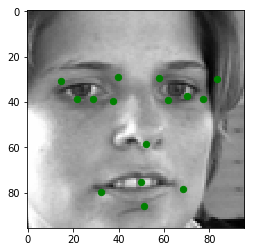

In [30]:
plt.imshow(test_input[6].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [32]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[7][i])
    else:
        y_list.append(pred[7][i])
print(x_list)
print(y_list)

[68.79003, 29.86428, 61.196377, 73.30215, 36.402317, 23.772364, 56.829742, 79.7305, 38.43829, 17.54479, 50.15292, 64.82858, 34.218643, 49.037437, 49.752335]
[36.798847, 37.55808, 38.10287, 37.997097, 38.944466, 38.426292, 29.684315, 30.703575, 29.566679, 30.203348, 55.491203, 75.64256, 76.072655, 72.18889, 83.93586]


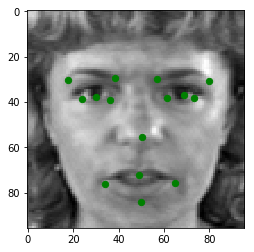

In [33]:
plt.imshow(test_input[7].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)

In [34]:
x_list=[]
y_list=[]
for i in range(30):
    if i%2==0:
        x_list.append(pred[8][i])
    else:
        y_list.append(pred[8][i])
print(x_list)
print(y_list)

[68.20125, 31.565636, 61.361908, 74.17673, 37.852287, 24.48495, 58.480446, 81.9064, 41.456245, 18.024652, 49.84163, 63.03887, 33.878574, 48.85403, 49.27056]
[41.098083, 40.525085, 41.26454, 41.070595, 40.268547, 38.738, 32.486244, 33.737186, 30.980642, 30.406631, 57.095093, 79.926445, 79.81045, 74.76473, 87.80714]


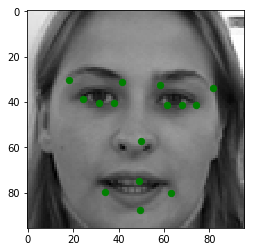

In [35]:
plt.imshow(test_input[8].reshape(96,96), cmap="gray")
plt.scatter(x_list,y_list, c='g',s=40)